In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 4)

In [2]:
df = pd.read_csv('data/data_hackathon03.csv')
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df = df.set_index('date').sort_index()
df.head()

,variable,value
date,,
2004-01-01 00:00:00,area_1,16.853
2004-01-01 00:00:00,area_2,126.259
2004-01-01 00:00:00,area_3,79.830
2004-01-01 01:00:00,area_1,16.450
2004-01-01 01:00:00,area_2,123.313


In [3]:
print(df.shape)#(51480, 2)
df.info()

(51480, 2)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51480 entries, 2004-01-01 00:00:00 to 2005-12-15 23:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variable  51480 non-null  object 
 1   value     43656 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [4]:
df.index.min() #Timestamp('2004-01-01 00:00:00')
df.index.max() #Timestamp('2005-12-15 23:00:00')

df.variable.value_counts()


area_2    17160
area_3    17160
area_1    17160
Name: variable, dtype: int64

<AxesSubplot:xlabel='date'>

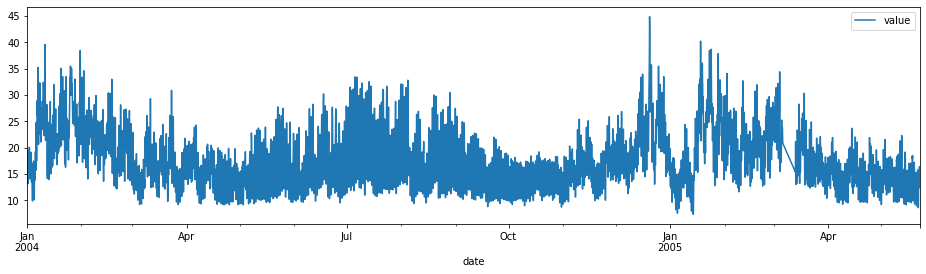

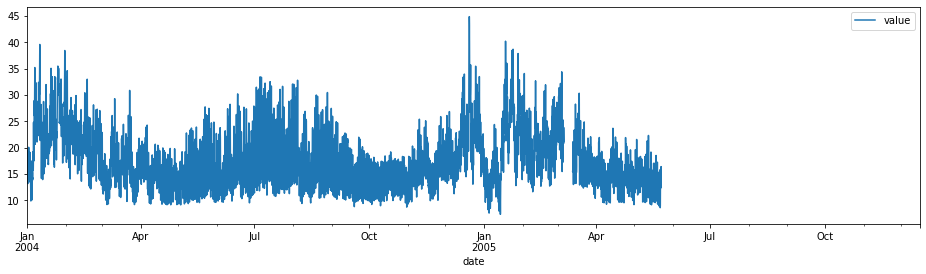

In [5]:
#AREA 1
df_area_1 = df[df.variable == 'area_1'].drop('variable',axis=1)

#find out the final of the area_1 information
list_missing_days_a1 = df_area_1[df_area_1.value.isnull()].resample('d').max()
df_area_1.resample('d').max().loc['may 2005'] #missing since 2005-05-23

df_area_1_ori = df_area_1.copy()
df_area_1 = df_area_1.loc[:'2005-05-22']

#missing values
df_area_1.isnull().sum()#168
df_area_1['value'] = df_area_1.value.interpolate()
df_area_1.isnull().sum()#0

#missing dates/hours
df_area_1.resample('h').mean().isnull().sum()#0

df_area_1.plot()
df_area_1_ori.plot()

<AxesSubplot:xlabel='date'>

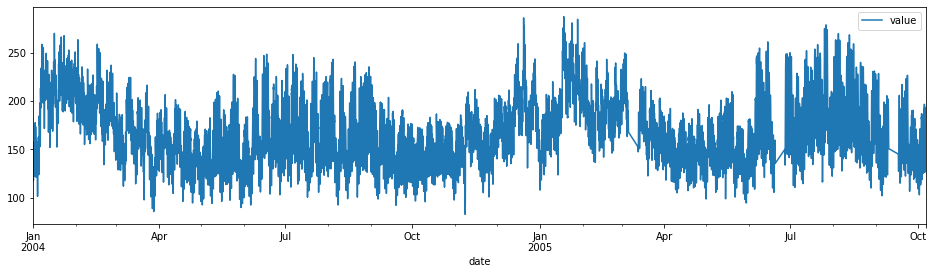

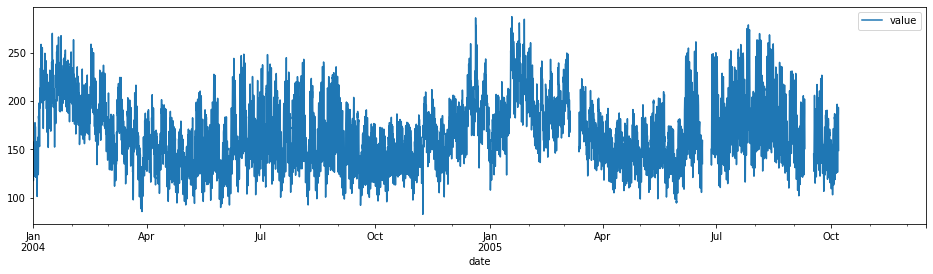

In [6]:
#AREA 2
df_area_2 = df[df.variable == 'area_2'].drop('variable',axis=1)

#find out the final of the area_2 information
list_missing_days_a2 = df_area_2[df_area_2.value.isnull()].resample('d').max()
df_area_2.resample('d').max().loc['oct 2005'] #missing since 2005-10-07

df_area_2_ori = df_area_2.copy()
df_area_2 = df_area_2.loc[:'2005-10-06']


#missing values
df_area_2.isnull().sum()#504
df_area_2['value'] = df_area_2.value.interpolate()
df_area_2.isnull().sum()#0

#missing dates/hours
df_area_2.resample('h').mean().isnull().sum()#0

df_area_2.plot()
df_area_2_ori.plot()

<AxesSubplot:xlabel='date'>

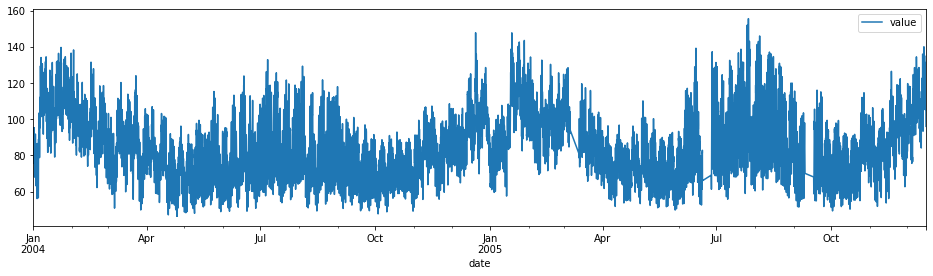

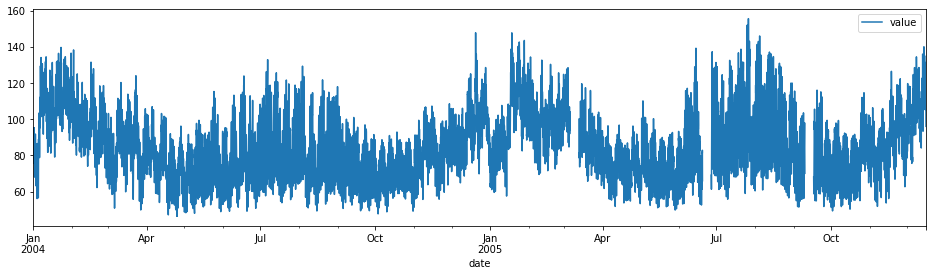

In [7]:
#AREA 3
df_area_3 = df[df.variable == 'area_3'].drop('variable',axis=1)
df_area_3.index.max()#Timestamp('2005-12-15 23:00:00')

df_area_3_ori = df_area_3.copy()

#missing values
df_area_3.isnull().sum()#504
df_area_3['value'] = df_area_3.value.interpolate()
df_area_3.isnull().sum()#0

#missing dates/hours
df_area_3.resample('h').mean().isnull().sum()#0

df_area_3.plot()
df_area_3_ori.plot()


In [8]:
#save as pickle file
df_area_1.to_pickle('data/clean/df_area_1.pickle')
df_area_2.to_pickle('data/clean/df_area_2.pickle')
df_area_3.to_pickle('data/clean/df_area_3.pickle')

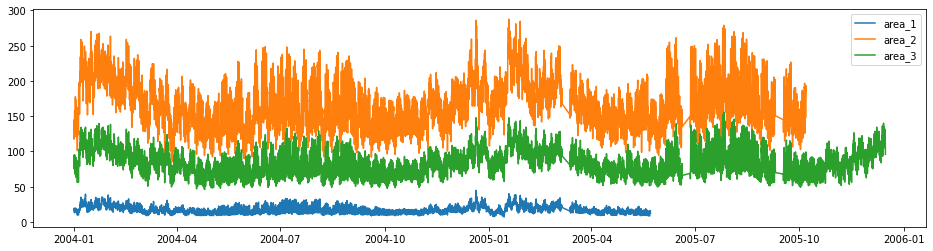

In [9]:
#plot
plt.plot(df_area_1, label='area_1')
plt.plot(df_area_2, label='area_2')
plt.plot(df_area_3, label='area_3')
plt.legend();